In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier 
import time

# Assignment 2 - Regression
### Predict the TOTAL COMPENSATION for this year. 

The data file provided is a salary survey for tech workers in Europe. We want to predict the total amount of compensation they bring in each year, based off of the details of their work. 

Some notes that will be important:
<ul>
    <li>The total compensation will need to be constructed, there is a column for salary, "Yearly brutto salary (without bonus and stocks) in EUR", as well as a column for bonus compensation, "Yearly bonus + stocks in EUR". 
    <li>Some categorical variables will need some work, and there isn't generally an exact answer. The main concern is things with categories that have a bunch of values with a very small count. For example, if there is only 1 person in City X, then that value likely needs to be addressed. We don't want it encoded into a new column of one 1 and thousands of 0s. 
    <li>There is an article exploring some of the data here: https://www.asdcode.de/2021/01/it-salary-survey-december-2020.html
    <li>Imputation and a bit of data manipulation will be required. 
    <li>Use any regression method you'd like. Some ones are closely related to what we've done, you may want to look at them, e.g. ExtraTreesRegressor. 
    <li>Initial accurracy, and potentially final accuracy, may not be great. When I made a plain model will little optimization the errors were large and the R2 was low. There is lots of room for optimization. 
    <li>Research challenge - try some work on the target, look into TransformedTargetRegressor and see if that helps. Recall in stats when we had skewed distributions... Maybe it helps, maybe it doesn't. 
    <li>EDA and data prep are up to you - you'll probably need to do a little exploring to figure out what cleanup is needed. When I did it, I did things kind of iteratively when I did it. For example, look at the value counts, figure out how to treat the different categories, clean something up, look at the results, potentially repeat if needed. After you figure out what needs to be done, you may be able to take some of those steps and incorporate them into a pipeline to be cleaner....
    <li><b>CRITICAL - Please make sure your code runs with RUN ALL. It should load the data that you're given, do all the processing, and spit out results. Comment out or remove anything that you've cleaned up and don't need - e.g. if you scaled a value manually, then moved that into a pipeline, don't leave the original scaling code active when the file is run.</b>
</ul>

### Details and Deliverables

You'll need to build code to produce the predictions. In particular, there's a few things that'll be marked:
<ul>
    <li>Please add a markdown cell at the bottom, and put in a few notes addressing the following:
    <ul>
        <li> Accuracy of your models with/without feature selection. Include both train/test for each. Please use R2 and RMSE. 
        <li> Feature Selection - Please identify what you did for feature selection. No need for a long explaination, something along the lines of "I did X, and the result was that 4 features were removed". Try at least 2 things. 
        <li> Hyperparameter Changes / Grid Search Improvements. What did you try, and why. Similar explaination to above, short. 
        <li> Overall this section should be roughly as long as this intro block - just outline what the results were, what you did to improve, and the results after. 
        <li> If you could use titles/bullet points I'd really appreciate it. 
    </ul>
    <li>Grade Breakdown:
    <ul>
        <li> Code is readable, there are comments: 20%
        <li> Explaination as defined above: 60% (20% each point)
        <li> Accuracy: 20% As compared to everyone else. This will be generously graded, I won't be surprised if overall accuracy is low for most people. 
    </ul>
</ul>

In [2]:
df = pd.read_csv("Euro_Salary.csv")
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,1253,1248,24/11/2020 13:55:19,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1226.0,NaN,NaN,NaN,32.509788,5.663804,20.0,29.0,32.0,35.0,69.0
Gender,1243,3,Male,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1253,119,Berlin,681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,1247,148,Software Engineer,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total years of experience,1237,48,10,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Years of experience in Germany,1221,53,2,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seniority level,1241,24,Senior,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Your main technology / programming language,1126,256,Java,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other technologies/programming languages you use often,1096,562,Javascript / Typescript,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df[393:396]

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
393,24/11/2020 19:15:02,30.0,Male,Moscow,Software Engineer,5,0,Middle,C,C/C++,14712.0,0,30,Full-time employee,Unlimited contract,Russian,101-1000,Product
394,24/11/2020 19:15:49,33.0,Male,Berlin,Product Manager,5,5,Senior,NaN,Python,70000.0,800,30,Full-time employee,NaN,German,101-1000,Product
395,24/11/2020 19:19:30,35.0,Male,Berlin,QA Engineer,11,10,Senior,Java,"Python, Javascript / Typescript, .NET, Java / ...",74400.0,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product


In [4]:
df["Other technologies/programming languages you use often"].value_counts()

Javascript / Typescript                                                                   44
Python                                                                                    37
SQL                                                                                       31
AWS, Docker                                                                               16
Kotlin                                                                                    15
                                                                                          ..
Python, Ruby, Java / Scala, Go, Rust, AWS, Kubernetes, Docker, Terraform, helm, packer     1
Kotlin, SQL, AWS, Kubernetes, Docker                                                       1
Python, R, Go                                                                              1
C/C++, PHP, SQL                                                                            1
Python, AWS, Kubernetes, Docker, terraform, ansible                   

In [5]:
df.sample(20)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
1042,01/12/2020 19:26:55,31.0,Male,Munich,Software Engineer,5,2,Middle,Java,"Javascript / Typescript, Java / Scala, SQL, Do...",74000.0,3000,27,Full-time employee,Unlimited contract,English,1000+,Product
1080,04/12/2020 11:18:51,25.0,Male,Hamburg,Software Engineer,1,1,Junior,C#,"Javascript / Typescript, .NET, SQL, Kubernetes",43500.0,NaN,28,Full-time employee,Unlimited contract,German,51-100,Startup
996,30/11/2020 21:57:56,37.0,Male,Berlin,Data Scientist,10,10,Senior,Python,"Python, SQL, AWS, Azure, Kubernetes, Docker",82000.0,0,30,Full-time employee,Unlimited contract,English,101-1000,Product
15,24/11/2020 11:18:41,31.0,Male,Wolfsburg,Backend Developer,5,1,Senior,Kotlin,NaN,75000.0,2000,25,Full-time employee,Unlimited contract,English,101-1000,Consulting / Agency
956,30/11/2020 13:10:41,31.0,Male,Berlin,Software Engineer,6,4,Senior,Kotlin,"Kotlin, PHP, Java / Scala, SQL, Go, AWS, Kuber...",90000.0,99000,28,Full-time employee,Unlimited contract,English,1000+,Product
953,30/11/2020 12:49:08,29.0,Male,Helsinki,Frontend Developer,10,0,Senior,TypeScript,Javascript / Typescript,60000.0,2500,NaN,Full-time employee,Unlimited contract,English,101-1000,Product
870,27/11/2020 19:45:57,34.0,Male,Berlin,BI Developer / Data Engineer,10,5,Senior,SQL,Python,75000.0,7500,30,Full-time employee,Unlimited contract,English,101-1000,Product
480,25/11/2020 07:46:34,23.0,Male,Berlin,Software Engineer,3,3,Middle,JavaScript,AWS,60000.0,6000,30,Full-time employee,Unlimited contract,English,1000+,Product
357,24/11/2020 18:10:54,26.0,Male,Karlsruhe,Software Engineer,5,5,NaN,NaN,"Python, Kotlin, Javascript / Typescript, Java ...",55000.0,0,30,Full-time employee,Unlimited contract,50/50,11-50,Consulting / Agency
519,25/11/2020 10:35:44,25.0,Male,Berlin,Software Engineer,6,2,Middle,Java,"Python, Java / Scala, Go, AWS, Kubernetes, Docker",63700.0,1600,29,Full-time employee,Unlimited contract,English,1000+,e-commerce


In [6]:
df['Yearly brutto salary (without bonus and stocks) in EUR'] = pd.to_numeric(df['Yearly brutto salary (without bonus and stocks) in EUR'], downcast='float', errors='coerce')
df['Yearly bonus + stocks in EUR'] = pd.to_numeric(df['Yearly bonus + stocks in EUR'], downcast='float', errors='coerce')
df['Yearly bonus + stocks in EUR'].fillna(0, inplace=True)

df['target'] = df['Yearly brutto salary (without bonus and stocks) in EUR'] + df['Yearly bonus + stocks in EUR']
df.drop(columns={"Timestamp", "Yearly brutto salary (without bonus and stocks) in EUR", "Yearly bonus + stocks in EUR"}, inplace=True)

df.head()

,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,target
0,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",30,Full-time employee,Unlimited contract,English,51-100,Product,85000.0
1,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product,80000.0
2,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,240000.0
3,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,54000.0
4,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",29,Full-time employee,Unlimited contract,English,101-1000,Product,62000.0


In [7]:
df.isnull().sum()

Age                                                        27
Gender                                                     10
City                                                        0
Position                                                    6
Total years of experience                                  16
Years of experience in Germany                             32
Seniority level                                            12
Your main technology / programming language               127
Other technologies/programming languages you use often    157
Number of vacation days                                    68
Employment status                                          17
Сontract duration                                          29
Main language at work                                      16
Company size                                               18
Company type                                               25
target                                                      0
dtype: i

In [8]:
df["Other technologies/programming languages you use often"].value_counts()

Javascript / Typescript                                                                   44
Python                                                                                    37
SQL                                                                                       31
AWS, Docker                                                                               16
Kotlin                                                                                    15
                                                                                          ..
Python, Ruby, Java / Scala, Go, Rust, AWS, Kubernetes, Docker, Terraform, helm, packer     1
Kotlin, SQL, AWS, Kubernetes, Docker                                                       1
Python, R, Go                                                                              1
C/C++, PHP, SQL                                                                            1
Python, AWS, Kubernetes, Docker, terraform, ansible                   

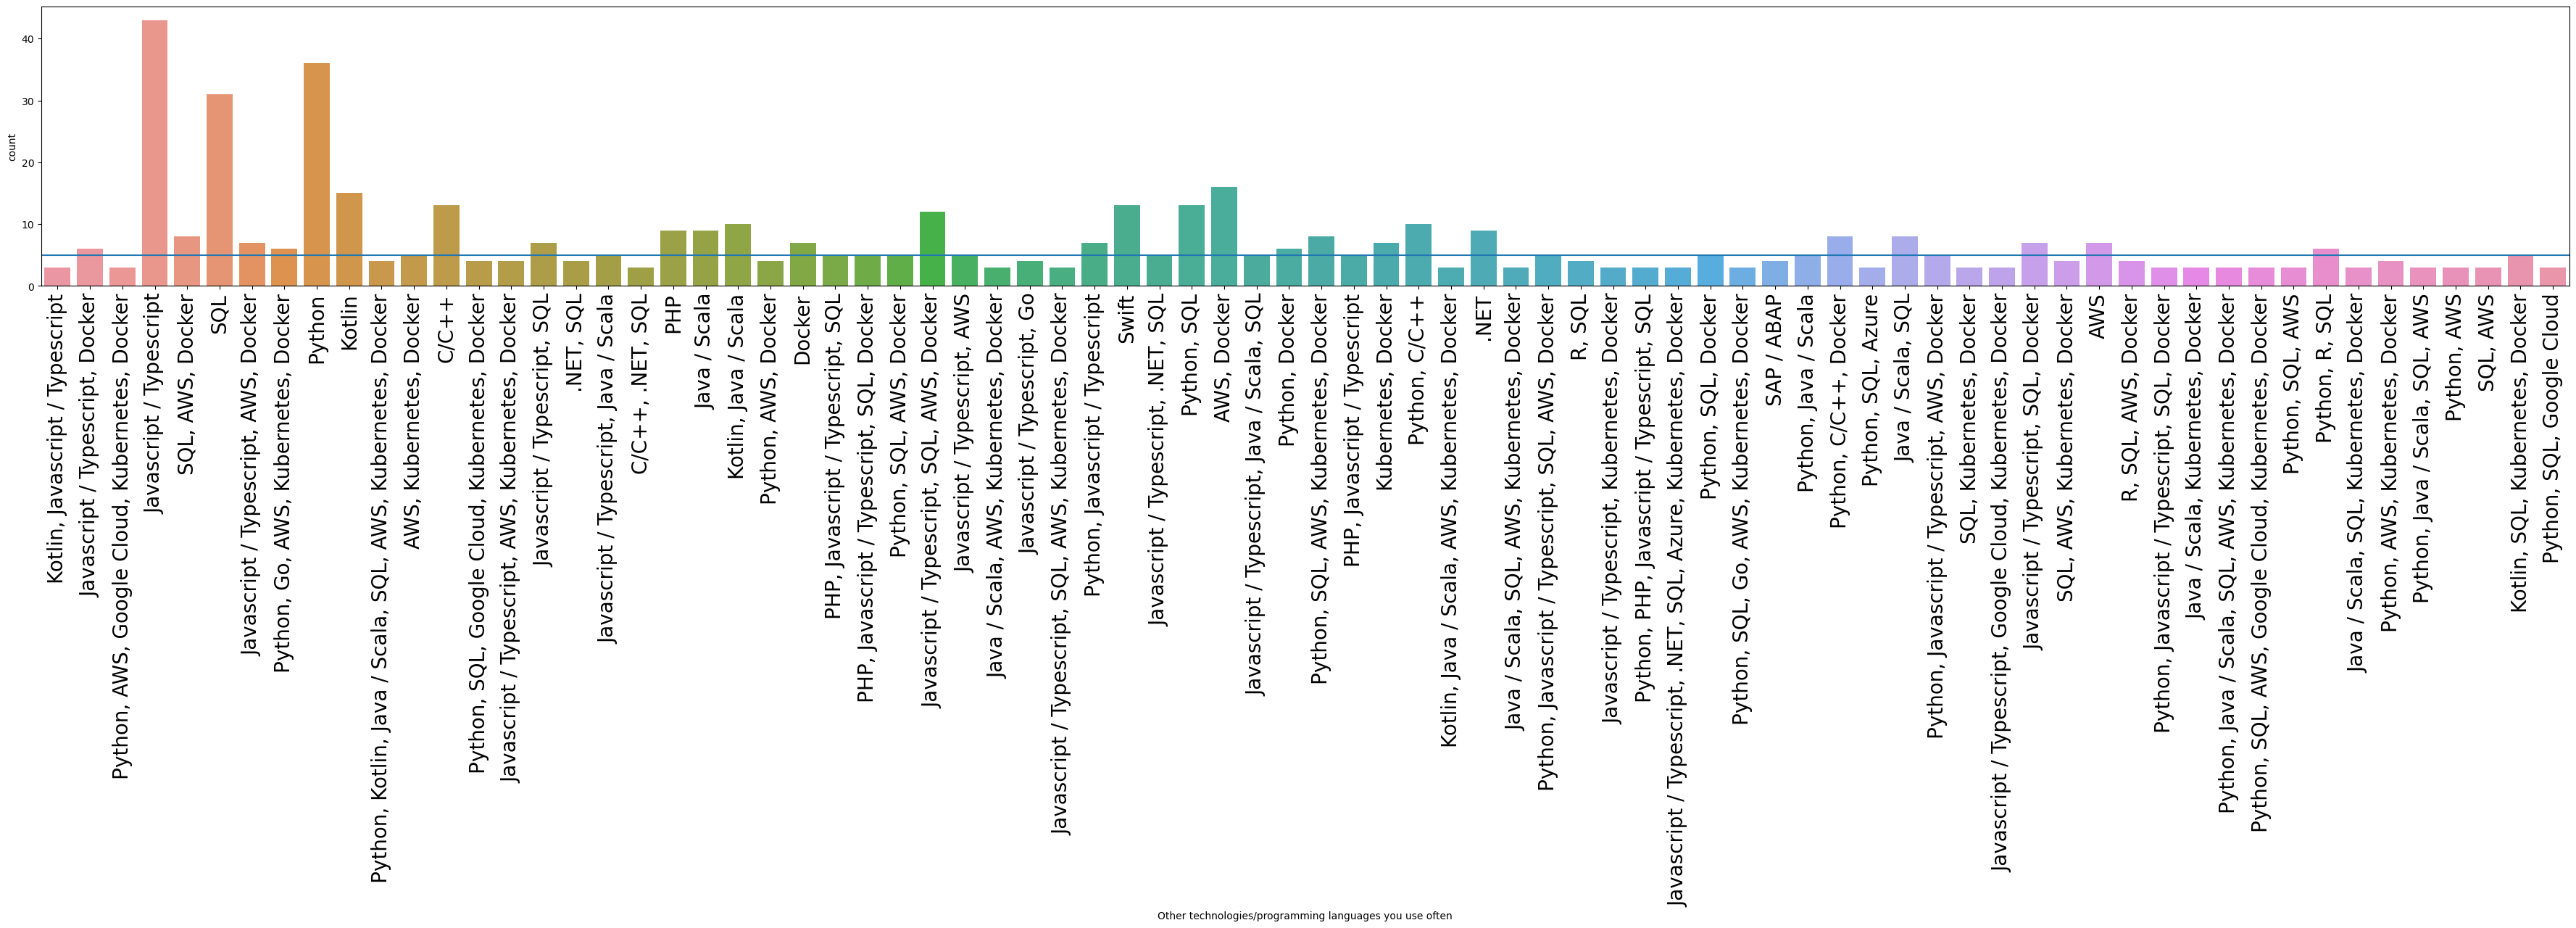

In [9]:
df_tmp = df[df.groupby("Other technologies/programming languages you use often")["Other technologies/programming languages you use often"].transform('size') > 2]
df_tmp = df_tmp[df_tmp["target"] < 250000]

plt.figure(figsize=(45,5))
ax = sns.countplot(x="Other technologies/programming languages you use often", data=df_tmp)
ax.axhline(5)
ax.tick_params(axis='x', rotation=90, labelsize=20)

In [10]:
df = df.rename(columns={'Position ': 'Position'}) #remove the space

In [11]:
def replace_low_freq(d, col, threshold=2, replacement='other'):
    value_counts = d[col].value_counts()
    to_remove = value_counts[value_counts <= threshold].index
    tmp = d[col].replace(to_replace=to_remove, value=replacement)
    return tmp

In [12]:
df["Your main technology / programming language"] = replace_low_freq(df, "Your main technology / programming language", 2, "Other")

df["Your main technology / programming language"].replace({"Javascript": "JavaScript", "javascript":"JavaScript", "JavaScript ":"JavaScript", "JS":"JavaScript", "Typescript":"TypeScript","Python ":"Python", "python":"Python", "c++":"C++", "java":"Java", "php":"PHP", "Php":"PHP", ".net":".NET", ".Net":".NET", "Golang":"Go"}, inplace=True)
df["Your main technology / programming language"] = df["Your main technology / programming language"].fillna(df["Your main technology / programming language"].mode()[0])

df["Your main technology / programming language"].value_counts()

Other                      361
Python                     211
Java                       193
JavaScript                  91
PHP                         69
C++                         41
C#                          30
Go                          26
Swift                       24
Scala                       24
.NET                        23
TypeScript                  22
Kotlin                      22
Ruby                        19
SQL                         14
iOS                         10
C                           10
R                            9
Android                      8
Kubernetes                   7
Javascript / Typescript      6
Elixir                       5
ABAP                         5
QA                           4
AWS                          4
React                        3
Ruby on Rails                3
Cloud                        3
Node.js                      3
Embedded                     3
Name: Your main technology / programming language, dtype: int64

In [13]:
#Too many unique specific scenarios to group together I believe
df = df[df.groupby('Other technologies/programming languages you use often')['Other technologies/programming languages you use often'].transform('size') > 0]
df["Other technologies/programming languages you use often"].value_counts()

Javascript / Typescript                                                                   44
Python                                                                                    37
SQL                                                                                       31
AWS, Docker                                                                               16
Kotlin                                                                                    15
                                                                                          ..
Python, Ruby, Java / Scala, Go, Rust, AWS, Kubernetes, Docker, Terraform, helm, packer     1
Kotlin, SQL, AWS, Kubernetes, Docker                                                       1
Python, R, Go                                                                              1
C/C++, PHP, SQL                                                                            1
Python, AWS, Kubernetes, Docker, terraform, ansible                   

In [14]:
df["Seniority level"] = replace_low_freq(df, "Seniority level", 1, "Other")
df['Seniority level'] = df['Seniority level'].fillna(value=df['Seniority level'].mode()[0])
df['Seniority level'].mode()[0]
df["Seniority level"].value_counts()

Senior       514
Middle       307
Lead         152
Junior        68
Head          38
Other         14
Principal      3
Name: Seniority level, dtype: int64

In [15]:
df["Gender"].value_counts()

Male       946
Female     144
Diverse      2
Name: Gender, dtype: int64

In [16]:
df["Total years of experience"] = pd.to_numeric(df["Total years of experience"].astype(str).str.replace(',', '.'), errors='coerce')
df = df[df["Total years of experience"] <= 40] #40 years or so should be the max for a career generally
df["Total years of experience"].value_counts()

10.0    126
5.0     116
6.0      82
8.0      80
4.0      74
7.0      68
12.0     61
15.0     55
9.0      54
3.0      53
2.0      49
11.0     39
13.0     38
14.0     37
1.0      26
20.0     25
16.0     19
18.0     14
17.0     11
25.0      7
19.0      6
0.0       6
22.0      5
2.5       4
30.0      4
1.5       4
21.0      3
23.0      2
27.0      2
4.5       2
3.5       2
0.8       2
28.0      1
29.0      1
24.0      1
40.0      1
5.5       1
26.0      1
31.0      1
7.5       1
Name: Total years of experience, dtype: int64

In [17]:
#Manually change vacation days as there's too many weird variables

df["Number of vacation days"] = df["Number of vacation days"].astype(str).str.lower()

df["Number of vacation days"] = df["Number of vacation days"].str.replace("unlimited", "30")
df["Number of vacation days"] = df["Number of vacation days"].str.replace("in contract \(but theoretically unlimited\)", "30")
df["Number of vacation days"] = df["Number of vacation days"].str.replace("[^0-9.]", "", regex=True)

df["Number of vacation days"] = pd.to_numeric(df["Number of vacation days"], errors='coerce')

df.loc[df["Number of vacation days"] > 60, "Number of vacation days"] = np.nan #60 is most likely the max amount of vacay days barring any exceptions

df["Number of vacation days"].fillna(df["Number of vacation days"].median(), inplace=True)
df["Number of vacation days"].value_counts()

C:\Users\godly\AppData\Local\Temp\ipykernel_12520\1460876985.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Number of vacation days"] = df["Number of vacation days"].str.replace("in contract \(but theoretically unlimited\)", "30")


30.0    440
28.0    246
27.0     92
25.0     79
24.0     60
26.0     59
29.0     24
20.0      9
21.0      8
32.0      8
22.0      8
31.0      7
36.0      5
23.0      5
0.0       4
35.0      4
40.0      4
14.0      3
33.0      3
15.0      2
12.0      2
45.0      2
38.0      1
60.0      1
16.0      1
3.0       1
50.0      1
37.5      1
1.0       1
5.0       1
39.0      1
34.0      1
Name: Number of vacation days, dtype: int64

In [18]:
df["Years of experience in Germany"] = df["Years of experience in Germany"].astype(str).str.lower()

df["Years of experience in Germany"] = df["Years of experience in Germany"].str.replace(',', '.')
df["Years of experience in Germany"] = df["Years of experience in Germany"].str.extract('([0-9.]+)', expand=False)
df = df[df.groupby('Years of experience in Germany')['Years of experience in Germany'].transform('size') > 0]
df["Years of experience in Germany"] = pd.to_numeric(df["Years of experience in Germany"], errors='coerce')
df["Years of experience in Germany"].value_counts()

1.00     165
2.00     162
3.00     136
5.00     126
4.00     114
0.00      89
6.00      64
7.00      30
10.00     26
1.50      24
9.00      18
8.00      16
2.50      12
0.50      12
12.00     11
3.50      10
15.00      8
20.00      7
11.00      5
14.00      5
19.00      2
0.25       2
13.00      2
18.00      2
30.00      2
0.80       1
25.00      1
16.00      1
26.00      1
4.50       1
0.10       1
2.60       1
0.30       1
0.20       1
Name: Years of experience in Germany, dtype: int64

In [19]:
df["Employment status"].replace({"working student": "Working Student","Werkstudent": "Working Student"}, inplace=True)
df = df[df.groupby('Employment status')['Employment status'].transform('size') > 1]
df["Employment status"].value_counts()

Full-time employee            1011
Self-employed (freelancer)      24
Part-time employee               5
Founder                          3
Working Student                  3
Name: Employment status, dtype: int64

In [20]:
df = df[df.groupby('Сontract duration')['Сontract duration'].transform('size') > 1]
df["Сontract duration"].value_counts()

Unlimited contract    985
Temporary contract     51
Name: Сontract duration, dtype: int64

In [21]:
df = df[df.groupby('Main language at work')['Main language at work'].transform('size') > 0]
df["Main language at work"].value_counts()

English               858
German                153
Russian                 7
Italian                 3
Spanish                 3
English and German      2
50/50                   1
Русский                 1
Czech                   1
Deuglisch               1
French                  1
both                    1
Russian, English        1
Name: Main language at work, dtype: int64

In [22]:
df = df[df.groupby('Company size')['Company size'].transform('size') > 0]
df["Company size"].value_counts()

1000+       374
101-1000    340
11-50       142
51-100      127
up to 10     47
Name: Company size, dtype: int64

In [23]:
df = df[df.groupby('Position')['Position'].transform('size') > 0]
df["Position"].value_counts()

Software Engineer                               350
Backend Developer                               149
Data Scientist                                   95
Frontend Developer                               72
QA Engineer                                      51
                                               ... 
Fullstack engineer, ну или Software engineer      1
SW Architect                                      1
SAP Developer                                     1
Testautomation                                    1
IT Operations Manager                             1
Name: Position, Length: 110, dtype: int64

In [24]:
df = df[df.groupby('Company type')['Company type'].transform('size') > 0]
df["Company type"].value_counts()

Product                                  633
Startup                                  218
Consulting / Agency                      117
E-commerce                                 3
Corporation                                2
Finance                                    2
Utilities                                  2
Bank                                       2
University                                 2
Research                                   2
Transport & Logistics                      1
Semiconductor                              1
Science Institute                          1
Outsourse                                  1
Research institute                         1
Retail                                     1
Ecommerce                                  1
E-Commerce                                 1
Institute                                  1
Corporation                                1
Old industry                               1
FAANG                                      1
Handel    

In [25]:
#for column in ["Age", "Total years of experience", "Years of experience in Germany", "Number of vacation days"]:
    #df[column] = pd.to_numeric(df[column].astype(str).str.replace(',', '.'), errors='coerce')

In [26]:
df["Age"] = df["Age"].fillna(value = df["Age"].mean())
df['Gender'] = df['Gender'].fillna(value = df['Gender'].mode()[0])

In [27]:
df.isnull().sum()

Age                                                       0
Gender                                                    0
City                                                      0
Position                                                  0
Total years of experience                                 0
Years of experience in Germany                            0
Seniority level                                           0
Your main technology / programming language               0
Other technologies/programming languages you use often    0
Number of vacation days                                   0
Employment status                                         0
Сontract duration                                         0
Main language at work                                     0
Company size                                              0
Company type                                              0
target                                                    0
dtype: int64

# Pipeline

In [28]:
numeric_features = ["Age", "Total years of experience", "Years of experience in Germany", "Number of vacation days"]
numeric_transformer = Pipeline( steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", MinMaxScaler())
    ])

categorical_features = ["Gender", "Position", "Seniority level", "Your main technology / programming language", "Other technologies/programming languages you use often"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer( remainder='drop',
        transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ])

In [29]:
#Linear Regression
y = df["target"].values.reshape(-1,1)
X = df.drop(columns=["target"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe_LR_steps = [('preprocessor', preprocessor), ('model', LinearRegression())]
pipe_LR = Pipeline(pipe_LR_steps)

start = time.process_time()
pipe_LR.fit(X_train, y_train.ravel())
print(f"Training took {time.process_time() - start} seconds.")

print('Training CrossVal Score:', cross_val_score(pipe_LR, X_train, y_train, cv=5))

y_pred = pipe_LR.predict(X_test)

test_r2 = r2_score(y_test, y_pred)
print('Test R² score:', test_r2)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE:', test_rmse)

Training took 0.03125 seconds.
Training CrossVal Score: [-0.07984799 -0.83601297 -3.24266917 -4.46590194 -1.47318998]
Test R² score: -0.20587287913942154
Test RMSE: 81488.0339578628


In [30]:
#SGDRegressor
y = df["target"].values.reshape(-1,1)
X = df.drop(columns=["target"])
y_train_reshaped = y_train.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe_LR_steps = [('preprocessor', preprocessor), ('regressor', SGDRegressor())]
pipe_LR = Pipeline(pipe_LR_steps)

start = time.process_time()
pipe_LR.fit(X_train, y_train.ravel())
print(f"Training took {time.process_time() - start} seconds.")

print('Training CrossVal Score:', cross_val_score(pipe_LR, X_train, y_train, cv=5))

y_pred = pipe_LR.predict(X_test)
r2 = r2_score(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R² score: {r2}')
print(f'RMSE: {rmse}')

C:\Users\godly\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\godly\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\godly\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\godly\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

Training took 0.09375 seconds.
Training CrossVal Score: [ 0.01684912 -0.10043648 -0.11939939 -0.28675171 -0.14739544]
R² score: 0.057266902658604124
RMSE: 72050.57535756985


C:\Users\godly\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\godly\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\godly\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\godly\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

In [31]:
#Forest Regressor with Gridsearch
y = np.array(df["target"]).reshape(-1, 1)
X = df.drop(columns=["target"])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=0))
])

param_grid_rf = {
    "regressor__n_estimators": [100, 125], 
    "regressor__max_depth": [7,8,9,10],  
    "regressor__min_samples_leaf": [2, 3],  
    "regressor__min_samples_split": [7,8],  
    "regressor__max_features": ['log2'],  
    "regressor__criterion": ["squared_error", "absolute_error"]
}

clf_rf = GridSearchCV(pipe_rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
clf_rf.fit(X_train, y_train.ravel())
best_rf = clf_rf.best_estimator_

print(f"Best parameters: {clf_rf.best_params_}")

y_pred = best_rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

Best parameters: {'regressor__criterion': 'squared_error', 'regressor__max_depth': 10, 'regressor__max_features': 'log2', 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 8, 'regressor__n_estimators': 125}
R²: 0.021328830892360484
RMSE: 80431.88196227582


In [39]:
#Lasso SGD
lasso = Lasso(alpha=0.01, max_iter=10000)

pipe_LR_steps = [
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(lasso)),
    ('regressor', SGDRegressor())
]
pipe_LR = Pipeline(pipe_LR_steps)

start = time.process_time()
pipe_LR.fit(X_train, y_train.ravel())
print(f"Training took {time.process_time() - start} seconds.")

print('Training CrossVal Score:', cross_val_score(pipe_LR, X_train, y_train.ravel(), cv=5))

y_pred = pipe_LR.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R² score: {r2}')
print(f'RMSE: {rmse}')

C:\Users\godly\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 246273457835.5665, tolerance: 207708334.31532258
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\godly\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Training took 9.40625 seconds.


C:\Users\godly\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137556321966.0327, tolerance: 187587865.95633873
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\godly\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\godly\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162980940727.03455, tolerance: 183104036.78844443
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\godly\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached bef

Training CrossVal Score: [ 0.02905946  0.07782638 -0.0190445  -0.11669739  0.03495683]
R² score: 0.015675397107609346
RMSE: 80663.86055715119


C:\Users\godly\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26352324741.45125, tolerance: 111599024.1377628
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\godly\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [33]:
x_dum = pd.get_dummies(X, drop_first=True)
l1_selection = Lasso().fit(x_dum, y)
sfm = SelectFromModel(l1_selection, prefit=True)
x_reg_new = sfm.transform(x_dum)
print(x_reg_new.shape)

mask = sfm.get_support()
new_features = x_dum.columns[mask]
print(new_features)

(1022, 800)
Index(['Age', 'Total years of experience', 'Years of experience in Germany',
       'Number of vacation days', 'Gender_Female', 'Gender_Male',
       'City_Amsterdam', 'City_Ansbach', 'City_Barcelona', 'City_Berlin',
       ...
       'Company type_Semiconductor', 'Company type_Startup',
       'Company type_Telecommunications', 'Company type_Transport & Logistics',
       'Company type_University', 'Company type_Utilities',
       'Company type_corporate incubator', 'Company type_e-commerce',
       'Company type_eCommerce', 'Company type_service'],
      dtype='object', length=800)


C:\Users\godly\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.890e+11, tolerance: 3.769e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\godly\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [36]:
tree_sel = RandomForestRegressor().fit(x_dum, y)
sfm_class = SelectFromModel(tree_sel, prefit=True)
x_new = sfm_class.transform(x_dum)
print(x_new.shape)

mask = sfm_class.get_support()
new_features = x_dum.columns[mask]
print(new_features)

C:\Users\godly\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(1022, 98)
Index(['Age', 'Total years of experience', 'Years of experience in Germany',
       'Number of vacation days', 'Gender_Female', 'Gender_Male',
       'City_Berlin', 'City_Cologne', 'City_London', 'City_Milano',
       'City_Munich', 'City_Zurich', 'Position_CTO', 'Position_Data Engineer',
       'Position_Data Scientist', 'Position_Frontend Developer',
       'Position_ML Engineer', 'Position_Manager', 'Position_QA Engineer',
       'Position_Sales ', 'Position_Software Engineer',
       'Seniority level_Junior', 'Seniority level_Lead',
       'Seniority level_Middle', 'Seniority level_Other',
       'Seniority level_Senior',
       'Your main technology / programming language_C++',
       'Your main technology / programming language_Go',
       'Your main technology / programming language_Java',
       'Your main technology / programming language_Javascript / Typescript',
       'Your main technology / programming language_Kotlin',
       'Your main technology / programming

C:\Users\godly\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


# Answers and Explainations
(Expand/modify as needed)
- "Position" had an extra space in the column name
- Many columns had to be cleaned manually especially the vacation days and main program language.
- Used transform to cut out nulls where necessary
### Results
- Initially a -0.2058 r2 score with Linear Regression.
- The forest regression only got me to 0.0213
- I finally managed to get a decent accuracy rate with the SGD Regression at 0.0568
- With lasso, I got slightly worse results
### Feature Selection Activities
- I implemented Lasso Regression with an alpha value of 0.01 with features narrowed to 800 to help with getting slightly higher results
- I implemented Forest Regression with features narrowed to 100
### Hyperparameter Changes
- Used gridsearch with the Forest Regression along with various hyperparameters.
- Also tried max_leaf_node, max samples, etc.